# Modern Portfolio Theory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 
import time
from scipy.stats import norm
sns.set()
# Standard plotly imports
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='Abcde54321',                                              
                                  api_key='hcooLngkiMrN7qXHBs5s')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets

In [2]:
BCH = pd.read_csv('BCH_merged.txt', sep = ',')
XLM = pd.read_csv('XLM_merged.txt', sep = ',')
ADA = pd.read_csv('ADA_merged.txt', sep = ',')
USDT = pd.read_csv('USDT_merged.txt', sep = ',')
DASH = pd.read_csv('DASH_merged.txt', sep = ',')
ETC = pd.read_csv('ETC_merged.txt', sep = ',')
QTUM = pd.read_csv('QTUM_merged.txt', sep = ',')
ONT = pd.read_csv('ONT_merged.txt', sep = ',')
ICX = pd.read_csv('ICX_merged.txt', sep = ',')

In [3]:
BCH['time']

0       1514890800
1       1514894400
2       1514898000
3       1514901600
4       1514905200
5       1514908800
6       1514912400
7       1514916000
8       1514919600
9       1514923200
10      1514926800
11      1514930400
12      1514934000
13      1514937600
14      1514941200
15      1514944800
16      1514948400
17      1514952000
18      1514955600
19      1514959200
20      1514962800
21      1514966400
22      1514970000
23      1514973600
24      1514977200
25      1514980800
26      1514984400
27      1514988000
28      1514991600
29      1514995200
           ...    
3890    1528894800
3891    1528898400
3892    1528902000
3893    1528905600
3894    1528909200
3895    1528912800
3896    1528916400
3897    1528920000
3898    1528923600
3899    1528927200
3900    1528930800
3901    1528934400
3902    1528938000
3903    1528941600
3904    1528945200
3905    1528948800
3906    1528952400
3907    1528956000
3908    1528959600
3909    1528963200
3910    1528966800
3911    1528

In [3]:
List_BCH = []
List_XLM = []
List_ADA = []
List_USDT = []
List_DASH = []
List_ETC = []
List_QTUM = []
List_ONT = []
List_ICX = []
for i in range(len(BCH)):
    List_BCH.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(BCH['time'][i])))
for i in range(len(XLM)):
    List_XLM.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(XLM['time'][i])))
for i in range(len(ADA)):
    List_ADA.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(ADA['time'][i])))
for i in range(len(USDT)):
    List_USDT.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(USDT['time'][i])))
for i in range(len(DASH)):
    List_DASH.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(DASH['time'][i])))
for i in range(len(ETC)):
    List_ETC.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(ETC['time'][i])))
for i in range(len(QTUM)):
    List_QTUM.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(QTUM['time'][i])))
for i in range(len(ONT)):
    List_ONT.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(ONT['time'][i])))
for i in range(len(ICX)):
    List_ICX.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(ICX['time'][i])))

In [4]:
BCH['datetime'] = pd.DataFrame(List_BCH)
XLM['datetime'] = pd.DataFrame(List_XLM)
ADA['datetime'] = pd.DataFrame(List_ADA)
USDT['datetime'] = pd.DataFrame(List_USDT)
DASH['datetime'] = pd.DataFrame(List_DASH)
ETC['datetime'] = pd.DataFrame(List_ETC)
QTUM['datetime'] = pd.DataFrame(List_QTUM)
ONT['datetime'] = pd.DataFrame(List_ONT)
ICX['datetime'] = pd.DataFrame(List_ICX)

In [5]:
BCH['datetime'] = pd.to_datetime(BCH['datetime'])
XLM['datetime'] = pd.to_datetime(XLM['datetime'])
ADA['datetime'] = pd.to_datetime(ADA['datetime'])
USDT['datetime'] = pd.to_datetime(USDT['datetime'])
DASH['datetime'] = pd.to_datetime(DASH['datetime'])
ETC['datetime'] = pd.to_datetime(ETC['datetime'])
QTUM['datetime'] = pd.to_datetime(QTUM['datetime'])
ONT['datetime'] = pd.to_datetime(ONT['datetime'])
ICX['datetime'] = pd.to_datetime(ICX['datetime'])

In [6]:
BCH = BCH[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
XLM = XLM[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
ADA = ADA[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
USDT = USDT[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
DASH = DASH[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
ETC = ETC[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
QTUM = QTUM[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
ONT = ONT[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]
ICX = ICX[['datetime', 'close', 'high', 'low', 'open', 'logclose', 'loghigh', 'loglow', 'logopen', 'fluctuation']]

In [7]:
BCH = BCH.set_index('datetime')
XLM = XLM.set_index('datetime')
ADA = ADA.set_index('datetime')
USDT = USDT.set_index('datetime')
DASH = DASH.set_index('datetime')
ETC = ETC.set_index('datetime')
QTUM = QTUM.set_index('datetime')
ONT = ONT.set_index('datetime')
ICX = ICX.set_index('datetime')

## Plot 1: Time Series of every cryptocurrency

In [8]:
combined_df = BCH[['close']]
combined_df = combined_df.rename(columns = {'close': 'BCH'})
combined_df['XLM'] = XLM[['close']]
combined_df['ADA'] = ADA[['close']]
combined_df['USDT'] = USDT[['close']]
combined_df['DASH'] = DASH[['close']]
combined_df['ETC'] = ETC[['close']]
combined_df['QTUM'] = QTUM[['close']]
combined_df['ONT'] = ONT[['close']]
combined_df['ICX'] = ICX[['close']]

In [9]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index]
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    return fig

In [11]:
# Chart all of the cryptocurrency prices
fig = df_scatter(combined_df.dropna(), 'Cryptocurrency Prices', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')
py.iplot(fig, sharing='public')

In [9]:
combined_df.describe()

,BCH,XLM,ADA,USDT,DASH,ETC,QTUM,ONT,ICX
count,3920.000000,3919.000000,3920.000000,3918.000000,3920.000000,3920.000000,3920.000000,2161.000000,3920.000000
mean,1289.025143,0.365264,0.344161,1.004113,534.880227,22.727832,24.094906,5.477182,4.313610
std,472.886268,0.130019,0.214092,0.018080,226.178895,7.720191,11.929931,2.561329,2.283033
min,605.740000,0.165400,0.125000,0.958300,243.800000,12.210000,10.150000,1.050000,1.630000
25%,986.112500,0.278000,0.203475,0.999700,364.737500,16.080000,15.110000,3.550000,2.680000
50%,1209.095000,0.344500,0.282750,1.000000,472.425000,20.440000,19.875000,6.110000,3.725000
75%,1486.427500,0.431900,0.370925,1.000000,627.620000,29.472500,28.812500,7.580000,4.590000
max,2857.330000,0.918000,1.340000,1.130000,1238.790000,46.730000,73.780000,11.520000,12.480000


In [10]:
combined_df.skew()

BCH     1.230902
XLM     1.082307
ADA     1.818963
USDT    4.616253
DASH    1.175899
ETC     0.680692
QTUM    1.295418
ONT    -0.201828
ICX     1.419884
dtype: float64

In [11]:
combined_df.kurtosis()

BCH      1.369096
XLM      1.048463
ADA      3.104000
USDT    24.138684
DASH     0.735355
ETC     -0.748971
QTUM     0.932139
ONT     -1.176966
ICX      1.151112
dtype: float64

## Correlation Analysis

In [10]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2016
corr = combined_df.pct_change().corr(method='pearson')
corr

,BCH,XLM,ADA,USDT,DASH,ETC,QTUM,ONT,ICX
BCH,1.000000,0.628529,0.631842,0.007257,0.701805,0.704515,0.659774,0.442916,0.653474
XLM,0.628529,1.000000,0.744891,-0.014347,0.655160,0.654520,0.655494,0.422506,0.635786
ADA,0.631842,0.744891,1.000000,-0.000854,0.630188,0.649415,0.652892,0.439400,0.612079
USDT,0.007257,-0.014347,-0.000854,1.000000,0.001489,0.010425,-0.006057,0.004511,-0.011346
DASH,0.701805,0.655160,0.630188,0.001489,1.000000,0.697176,0.666142,0.372986,0.640479
ETC,0.704515,0.654520,0.649415,0.010425,0.697176,1.000000,0.705512,0.403062,0.647440
QTUM,0.659774,0.655494,0.652892,-0.006057,0.666142,0.705512,1.000000,0.404468,0.621286
ONT,0.442916,0.422506,0.439400,0.004511,0.372986,0.403062,0.404468,1.000000,0.417398
ICX,0.653474,0.635786,0.612079,-0.011346,0.640479,0.647440,0.621286,0.417398,1.000000


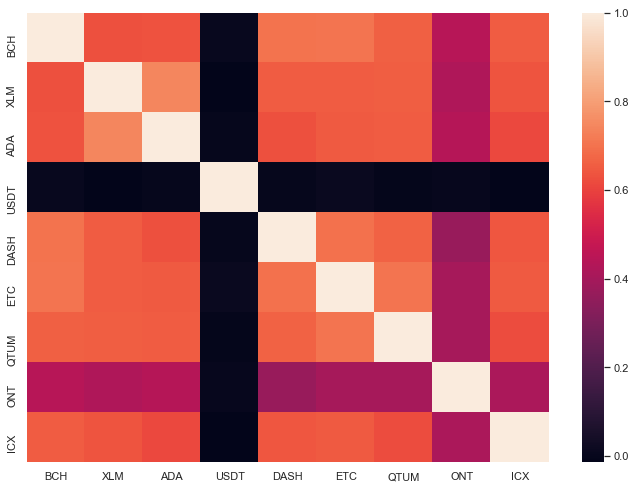

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Random Portfolio Generation

In [17]:
def portfolio_daily_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*len(returns2)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(returns2))
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((8,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(9)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [18]:
returns = combined_df.pct_change()
h = 24
x = np.arange(1,len(BCH)-7,24)
aux_BCH = []
aux_XLM = []
aux_ADA = []
aux_USDT = []
aux_DASH = []
aux_ETC = []
aux_QTUM = []
aux_ONT = []
aux_ICX = []
for i in x:
    aux_BCH.append(np.sum(returns['BCH'][i:i+h]))
    aux_XLM.append(np.sum(returns['XLM'][i:i+h]))
    aux_ADA.append(np.sum(returns['ADA'][i:i+h]))
    aux_USDT.append(np.sum(returns['USDT'][i:i+h]))
    aux_DASH.append(np.sum(returns['DASH'][i:i+h]))
    aux_ETC.append(np.sum(returns['ETC'][i:i+h]))
    aux_QTUM.append(np.sum(returns['QTUM'][i:i+h]))
    aux_ONT.append(np.sum(returns['ONT'][i:i+h]))
    aux_ICX.append(np.sum(returns['ICX'][i:i+h]))

returns2 = pd.DataFrame(aux_BCH,columns = ['BCH'])
returns2['XLM'] = pd.DataFrame(aux_XLM,columns = ['XLM'])
returns2['ADA'] = pd.DataFrame(aux_ADA,columns = ['ADA'])
returns2['USDT'] = pd.DataFrame(aux_USDT,columns = ['USDT'])
returns2['DASH'] = pd.DataFrame(aux_DASH,columns = ['DASH'])
returns2['ETC'] = pd.DataFrame(aux_ETC,columns = ['ETC'])
returns2['QTUM'] = pd.DataFrame(aux_QTUM,columns = ['QTUM'])
returns2['ONT'] = pd.DataFrame(aux_XLM,columns = ['ONT'])
returns2['ICX'] = pd.DataFrame(aux_XLM,columns = ['ICX'])

In [19]:
mean_returns = returns2.mean()
cov_matrix = returns2.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [20]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=combined_df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=combined_df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.04
Volatility: 0.94


             BCH    XLM   ADA  USDT  DASH   ETC  QTUM    ONT   ICX
allocation  5.85  26.51  1.13  21.2  0.59  9.74  0.09  25.67  9.21
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: -0.26
Volatility: 0.61


              BCH   XLM   ADA   USDT   DASH   ETC  QTUM   ONT    ICX
allocation  24.24  1.94  2.71  38.29  17.94  0.32  0.15  4.12  10.29


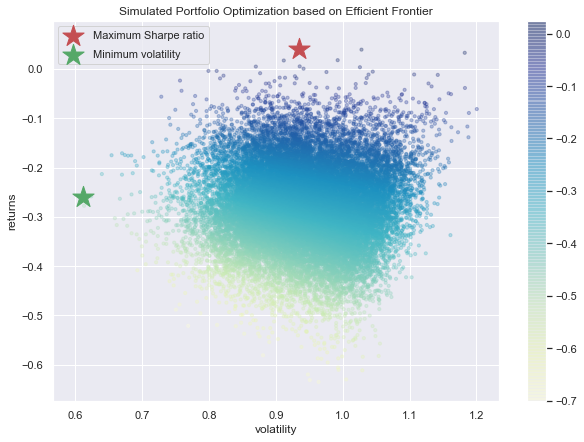

In [21]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Taking of certain cryptocurrencies

In [22]:
del returns2['XLM']
del returns2['ADA']
del returns2['USDT']

In [23]:
mean_returns = returns2.mean()
cov_matrix = returns2.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [24]:
def portfolio_daily_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*len(returns2)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(returns2))
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((5,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(6)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [25]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=returns2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=returns2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.05
Volatility: 1.17


             BCH  DASH    ETC  QTUM    ONT    ICX
allocation  0.52  0.46  23.27  0.87  33.27  41.62
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: -0.63
Volatility: 0.92


             BCH   DASH    ETC  QTUM   ONT   ICX
allocation  37.0  40.62  13.89   3.5  3.55  1.44


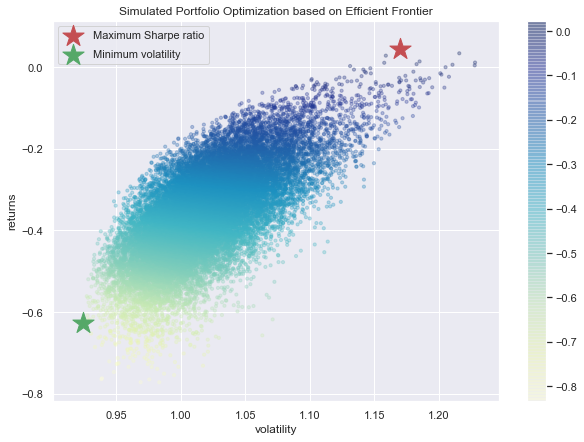

In [26]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Using only high return money

In [331]:
del returns2['QTUM']
del returns2['ONT']
del returns2['ICX']

In [332]:
mean_returns = returns2.mean()
cov_matrix = returns2.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [336]:
def portfolio_daily_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*len(returns2)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(returns2))
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(3)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [337]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=returns2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=returns2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: -0.18
Volatility: 1.07


              BCH   DASH     ETC
allocation 0.8100 0.2200 98.9700
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: -0.68
Volatility: 0.92


               BCH    DASH     ETC
allocation 35.0900 48.3200 16.5900


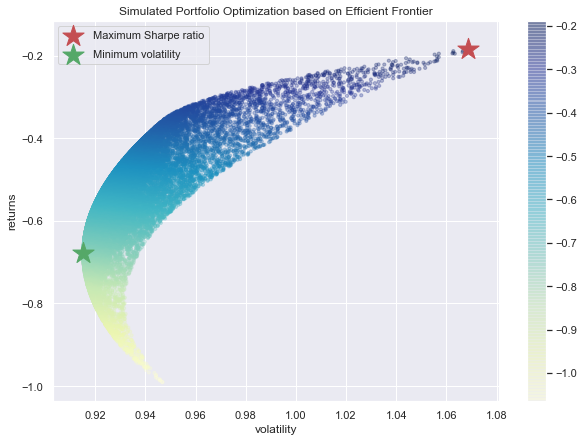

In [338]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Efficient Frontier

In [27]:
import scipy.optimize as sco

In [28]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_daily_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [29]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_daily_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [30]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_daily_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [33]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_daily_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=returns2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_daily_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=returns2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.2, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 0.13
Volatility: 1.3


            BCH  DASH  ETC  QTUM   ONT   ICX
allocation  0.0   0.0  0.0   0.0  50.0  50.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: -0.68
Volatility: 0.92


              BCH   DASH    ETC  QTUM  ONT  ICX
allocation  34.93  48.74  16.33   0.0  0.0  0.0


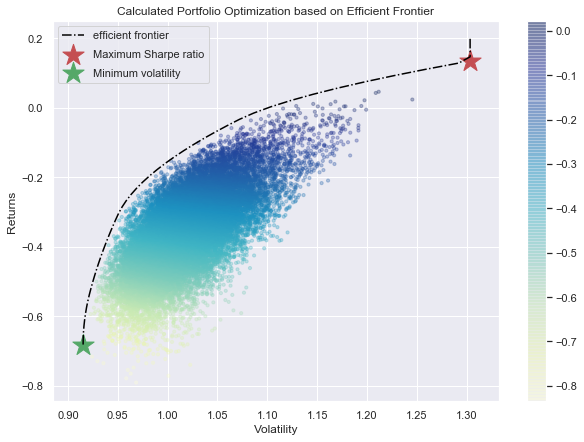

In [34]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

### Plotting the different cryptocurrencies on this plot

In [41]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_daily_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=returns2.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_daily_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=returns2.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns2)*np.sqrt(len(returns2))
    an_rt = mean_returns*(len(returns2))
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Daily Return:", round(rp,2))
    print( "Daily Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    print( "-"*80)
    print( "Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(returns2.columns):
        print( txt,":","return",round(an_rt[i],2),", volatility:",round(an_vol[i],2))
    print( "-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(returns2.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.2, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Daily Return: 0.13
Daily Volatility: 1.3


            BCH  DASH  ETC  QTUM   ONT   ICX
allocation  0.0   0.0  0.0   0.0  50.0  50.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: -0.68
Volatility: 0.92


              BCH   DASH    ETC  QTUM  ONT  ICX
allocation  34.93  48.74  16.33   0.0  0.0  0.0
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

BCH : return -0.48 , volatility: 0.97
DASH : return -1.0 , volatility: 0.94
ETC : return -0.18 , volatility: 1.07
QTUM : return -0.75 , volatility: 1.15
ONT : return 0.13 , volatility: 1.3
ICX : return 0.13 , volatility: 1.3
--------------------------------------------------------------------------------


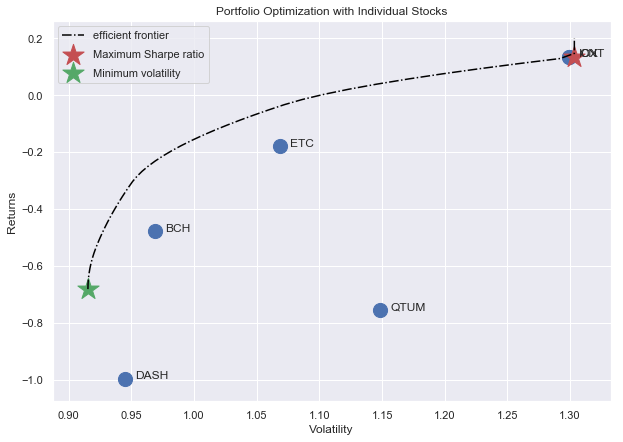

In [42]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

In [43]:
targets = np.linspace(0, 0.2, 21)
targets

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [44]:
opt_weigths = []
for i in targets:
    opt_weigths.append(efficient_return(mean_returns, cov_matrix, i)['x']*100)
    
vol = []
for i in targets:
    vol.append(portfolio_daily_performance(efficient_return(mean_returns, cov_matrix, i)['x'], mean_returns, cov_matrix)[1])

In [45]:
df = pd.DataFrame(opt_weigths, index = targets, columns = ['BCH', 'DASH', 'ETC', 'QTUM', 'ONT', 'ICX'])
pd.options.display.float_format = '{:.4f}'.format
df['Volatility'] = pd.DataFrame(vol, index = df.index)
df

,BCH,DASH,ETC,QTUM,ONT,ICX,Volatility
0.0000,0.0000,0.0000,42.7785,0.0000,28.6107,28.6107,-0.0000
0.0100,0.0000,0.0000,39.5848,0.0000,30.2076,30.2076,0.0100
0.0200,0.0000,0.0000,36.3912,0.0000,31.8044,31.8044,0.0200
0.0300,0.0000,0.0000,33.1975,0.0000,33.4013,33.4013,0.0300
0.0400,0.0000,0.0000,30.0038,0.0000,34.9981,34.9981,0.0400
0.0500,0.0000,0.0000,26.8102,0.0000,36.5949,36.5949,0.0500
0.0600,0.0000,0.0000,23.6165,0.0000,38.1918,38.1918,0.0600
0.0700,0.0000,0.0000,20.4228,0.0000,39.7886,39.7886,0.0700
0.0800,0.0000,0.0000,17.2291,0.0000,41.3854,41.3854,0.0800
0.0900,0.0000,0.0000,14.0355,0.0000,42.9823,42.9823,0.0900


In [46]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3920 entries, 2018-01-02 11:00:00 to 2018-06-14 19:00:00
Data columns (total 9 columns):
BCH     3920 non-null float64
XLM     3919 non-null float64
ADA     3920 non-null float64
USDT    3918 non-null float64
DASH    3920 non-null float64
ETC     3920 non-null float64
QTUM    3920 non-null float64
ONT     2161 non-null float64
ICX     3920 non-null float64
dtypes: float64(9)
memory usage: 306.2 KB
